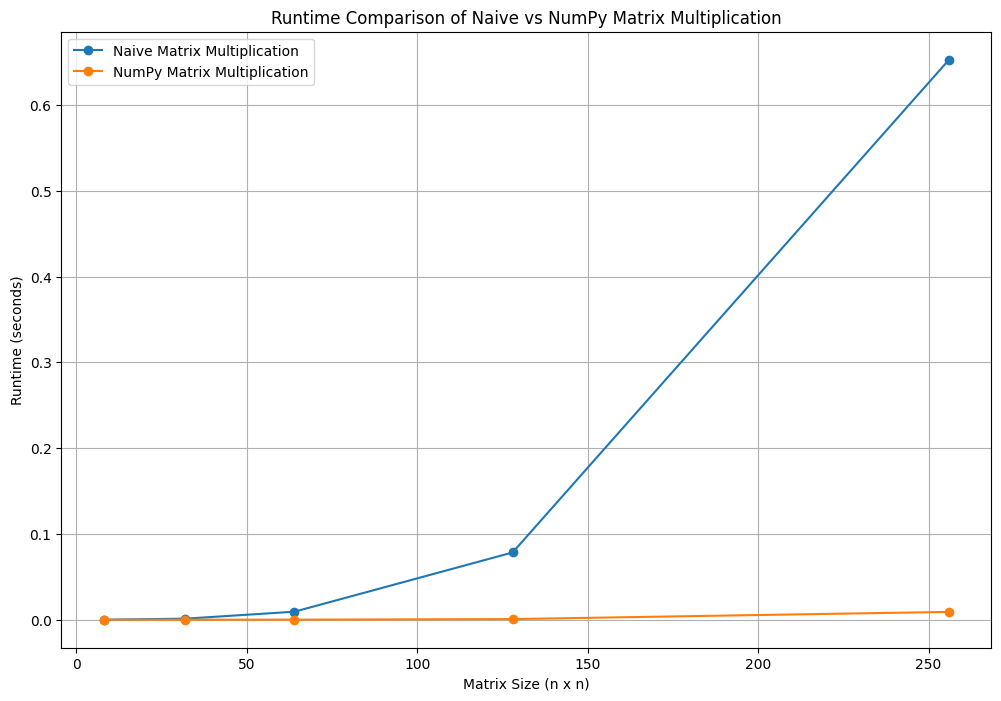

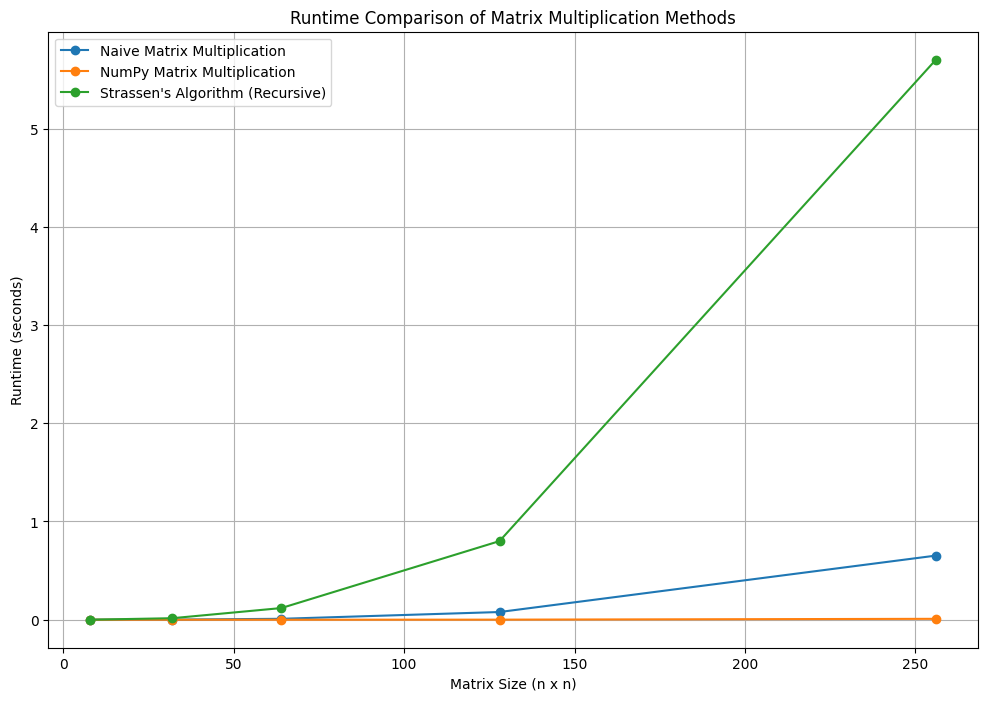

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# source: CodeCademy: Projects: Data Engineering, Fundamental Math for Data Science, Linear Algebra, Business Intelligence Data Analyst, advanced python 3.14
# YouTube: Merging DataFrames in pandas

# Exercise 1a): Implementing the standard matrix multiplication algorithm without pre-built functions
# This function takes two matrices A and B as input and computes their product C.
def matrix_multiply(A, B):
    
    n = len(A)
    m = len(A[0])
    p = len(B[0])
    C = [[0 for _ in range(p)] for _ in range(n)]
    for i in range(n):
        for j in range(p):
            for k in range(m):
                C[i][j] += A[i][k] * B[k][j]
    return C


# Benchmarking matrix sizes and recording times
matrix_sizes = [8, 32, 64, 128, 256]  # Example sizes
naive_results = []

for size in matrix_sizes:
    # Generate two random matrices of the current size
    A = np.random.randint(0, 10, size=(size, size)).tolist() # converts data into Python's list format (i.e. numpy Arrays)
    B = np.random.randint(0, 10, size=(size, size)).tolist()
    
    # Timing naive multiplication
    start_time = time.time() # time.time() in this context: Float (seconds, with decimal places for milliseconds).
    matrix_multiply(A, B)
    end_time = time.time()
    
    # Record time taken
    runtime = end_time - start_time
    naive_results.append((size, runtime))

# Exercise 1c): Compare with NumPy and plot time complexity
numpy_results = []

for size in matrix_sizes:
    # Generate random matrices for NumPy benchmark
    A_np = np.random.randint(0, 10, size=(size, size))
    B_np = np.random.randint(0, 10, size=(size, size))
    
    # Timing NumPy multiplication
    start_time = time.time()
    np.dot(A_np, B_np) # .dot() := Matrix multiplication 
    end_time = time.time()
    
    # Record time taken
    runtime = end_time - start_time
    numpy_results.append((size, runtime))

# Convert benchmark results to DataFrames
# Here I use pd.DataFrame to organize and analyze performance data for matrix operations. 
# It stores the matrix size and the time required for these operations in a table in the background, 
# allowing it to be reused later for plotting in the code below. 
# This approach saves many lines of code and is significantly more efficient.
naive_df = pd.DataFrame(naive_results, columns=["Matrix Size", "Runtime (seconds)"])
numpy_df = pd.DataFrame(numpy_results, columns=["Matrix Size", "Runtime (seconds)"])

# Plotting the runtime comparison
# The following paragraph visualizes a line chart and compares matrices (10x10 and 100x100) 
# along with the time required in seconds. Additionally, it can efficiently compare different matrix sizes.
plt.figure(figsize=(12, 8))
plt.plot(naive_df["Matrix Size"], naive_df["Runtime (seconds)"], label="Naive Matrix Multiplication", marker='o')
plt.plot(numpy_df["Matrix Size"], numpy_df["Runtime (seconds)"], label="NumPy Matrix Multiplication", marker='o')
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison of Naive vs NumPy Matrix Multiplication")
plt.legend()
plt.grid(True)
plt.show()


# Exercise 1e): Implement a simple version of Strassen’s algorithm and compare performance
# Strassen's helper functions for addition and subtraction of matrices
def add_matrix(A, B):
    """Element-wise addition of two matrices."""
    # The code is designed to add two matrices and return a new matrix whose elements are the corresponding sums 
    # from A and B. The list comprehension automates this process.
    size = len(A)
    return [[A[i][j] + B[i][j] for j in range(size)] for i in range(size)]

def subtract_matrix(A, B):
    """Element-wise subtraction of matrix B from matrix A."""
    # The function is intended to subtract B from A element-wise and 
    # return the resulting elements in a new matrix.
    size = len(A)
    return [[A[i][j] - B[i][j] for j in range(size)] for i in range(size)]

# Strassen's recursive algorithm
def strassen_recursive_fixed(A, B):
    """Recursive implementation of Strassen's algorithm for matrix multiplication."""
    # If the matrices A and B are only 1x1 in size, 
    # the direct multiplication is performed and the result is returned in a new 1x1 matrix.
    size = len(A)
    if size == 1:  # Base case for 1x1 matrix
        return [[A[0][0] * B[0][0]]]
    

    # Each of the input matrices A and B is divided into four quadrants: 
    # A11, A12, A21, A22 and B11, B12, B21, B22. 
    # These quadrants are each (n/2 x n/2) submatrices of the original matrices.
    mid = size // 2

    # Dividing matrices into quadrants
    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]
    
    B11 = [row[:mid] for row in B[:mid]]
    B12 = [row[mid:] for row in B[:mid]]
    B21 = [row[:mid] for row in B[mid:]]
    B22 = [row[mid:] for row in B[mid:]]

    # Calculating Strassen's products
    # Here the Strassen's algorithm calculates seven intermediate products: 
    # M1, M2,..., M7, which are combinations of the quadrants of A and B. 
    # These products are computed recursively using the same function "strassen_recursive_fixed". 
    # This involves the addition and subtraction of the submatrices using "add_matrix" and "subtract_matrix"
    # from the functions above.
    M1 = strassen_recursive_fixed(add_matrix(A11, A22), add_matrix(B11, B22))
    M2 = strassen_recursive_fixed(add_matrix(A21, A22), B11)
    M3 = strassen_recursive_fixed(A11, subtract_matrix(B12, B22))
    M4 = strassen_recursive_fixed(A22, subtract_matrix(B21, B11))
    M5 = strassen_recursive_fixed(add_matrix(A11, A12), B22)
    M6 = strassen_recursive_fixed(subtract_matrix(A21, A11), add_matrix(B11, B12))
    M7 = strassen_recursive_fixed(subtract_matrix(A12, A22), add_matrix(B21, B22))

    # Constructing result matrix C from quadrants
    # The quadrants of the resulting matrix C (as defined in line 21) 
    # are constructed from the calculated products M1 to M7: 
    # C11, C12, C21, C22, which represent the quadrants of C. 
    # The composition is performed through element-wise addition and subtraction.
    C11 = add_matrix(subtract_matrix(add_matrix(M1, M4), M5), M7)
    C12 = add_matrix(M3, M5)
    C21 = add_matrix(M2, M4)
    C22 = add_matrix(subtract_matrix(add_matrix(M1, M3), M2), M6)

    # Combine quadrants
    # A new matrix "new_matrix" is created to combine the results from the quadrants C11, C12, C21, C22.
    # Each cell in the new matrix is filled according to its position from the corresponding quadrants.
    # The for loop iterates the cells itself and fill the correct values in the right spaces.
    new_matrix = [[0] * size for _ in range(size)]
    for i in range(mid):
        for j in range(mid):
            new_matrix[i][j] = C11[i][j]
            new_matrix[i][j + mid] = C12[i][j]
            new_matrix[i + mid][j] = C21[i][j]
            new_matrix[i + mid][j + mid] = C22[i][j]
    
    return new_matrix

# Helper function to pad a matrix to the nearest power of 2
def pad_matrix(matrix, new_size):
    """Pads a matrix with zeros to make it square of size new_size."""
    # "old_size": Stores the size (number of rows) of the original matrix. 
    # The matrix is assumed to be square (rows = columns).
    # Creates a new square matrix with dimensions "new_size × new_size", 
    # where all elements are initialized to 0.
    old_size = len(matrix) 
    padded_matrix = [[0] * new_size for _ in range(new_size)]
    # the for loop copies the values of the original matrix into the new, larger matrix.
    for i in range(old_size):
        for j in range(old_size):
            padded_matrix[i][j] = matrix[i][j]
    return padded_matrix

# Benchmarking Strassen’s algorithm with padded matrices
# An empty list "strassen_results" is created to store the results. 
# Each element of the list contains a tuple: "(size, runtime)", where:  
# "size"": The size of the tested matrices nxn.  
# "runtime": The time required to multiply the matrices using Strassen's algorithm.
strassen_results = []

for size in matrix_sizes:
    # Generate random matrices and pad for Strassen's algorithm
    # Two nxn matrices A and B are generated:  
    # "np.random.randint(0, 10, size=(size, size))": Creates an nxn matrix with random integer values between 0 and 9.  
    # ".tolist()": Converts the numpy arrays into Python lists, which are required by the "pad_matrix" function.
    # So the code will be more efficient with this comprehension.
    A = np.random.randint(0, 10, size=(size, size)).tolist()
    B = np.random.randint(0, 10, size=(size, size)).tolist()
    # "padded_size" calculates the next power of 2 that is equal to or greater than size. 
    # To do this, size - 1 is analyzed using .bit_length() (this is required, 
    # to find the appropriate power of 2.
    padded_size = 2 ** (size - 1).bit_length()
    A_padded = pad_matrix(A, padded_size)
    B_padded = pad_matrix(B, padded_size)

    # Timing Strassen's algorithm
    # Here the code measures the performance of Strassen's algorithm for different matrix sizes
    # and collects the results for analysis and visualization to plot the right data later in the line table.

    start_time = time.time()
    strassen_recursive_fixed(A_padded, B_padded)
    strassen_results.append((size, time.time() - start_time))   # calculates the time difference between the current time and the recorded start_time, 
                                                                # representing how long the algorithm took to execute
                                                                # after it, the tuple is added to the list automatically

# Convert Strassen’s results to DataFrame and plot
# Here, the code accesses the previously created DataFrame, 
# which is a list of tuples containing the matrix sizes and runtimes of Strassen's algorithm.  
# pd.DataFrame: Converts this list into a table with two columns as explained above in line 60++:  
strassen_df = pd.DataFrame(strassen_results, columns=["Matrix Size", "Runtime (seconds)"])


# Plots the runtimes for NumPy matrix multiplication.
# Plots the runtimes of Strassen's algorithm from the previously created DataFrame "strassen_df".
# Then I need to label the axes and add the legend, which must be called separately.
# The "plt.grid(True)" function plots a grid in the background, making the diagram easier to read.
plt.figure(figsize=(12, 8))
plt.plot(naive_df["Matrix Size"], naive_df["Runtime (seconds)"], label="Naive Matrix Multiplication", marker='o')
plt.plot(numpy_df["Matrix Size"], numpy_df["Runtime (seconds)"], label="NumPy Matrix Multiplication", marker='o')
plt.plot(strassen_df["Matrix Size"], strassen_df["Runtime (seconds)"], label="Strassen's Algorithm (Recursive)", marker='o')
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison of Matrix Multiplication Methods")
plt.legend()
plt.grid(True) # enables the grid 
plt.show()


# Exercise 1.d):

# In my implementation of matrix multiplication, I used the classic, naive algorithm.
# Here, each matrix entry is calculated using a triple nested loop. For two matrices A and B 
# of size n x n, each entry of the resulting matrix C is calculated by summing the products
# of corresponding entries in the rows and columns. The time complexity of this method is O(n^3),
# as each loop runs n times. This means that for large matrices, the runtime increases very quickly – 
# especially as matrix size grows exponentially.

# In comparison, NumPy uses optimized libraries for matrix multiplication, such as BLAS and LAPACK.
# These libraries are written in lower-level languages and specifically optimized for numerical computations.
# This allows NumPy to perform operations much more efficiently than simple Python code.

# Although both approaches theoretically have the same time complexity of O(n^3), NumPy benefits from
# several optimizations that my implementation lacks. For instance, NumPy uses vectorization, which means
# that calculations are reduced to vector operations, avoiding Python loops. Additionally, parallelization
# allows calculations to be distributed across multiple processor cores, further boosting efficiency.
# Cache optimization is also a significant factor: by using better-tuned memory access patterns, NumPy
# reduces access times and enhances performance.

# Ultimately, the difference is most noticeable with large matrices, where my naive implementation is
# significantly slower. 

